## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Importing and checking the data

In [2]:
raw_data = pd.read_csv('C:/Users/irem/Desktop/The Data Science Course 2021 - All Resources/Part_5_Advanced_Statistical_Methods_(Machine_Learning)/S35_L225/1.04. Real-life example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [3]:
raw_data.describe(include='all') #we included all varbs since we have categorical varbs as well.

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [4]:
data = raw_data.drop(['Model'], axis=1) # pd.DataFrame.drop(['Varb'], axis)
# We dropped the varb Model since it seems that we cannot add 312 dummy varbs into our regression.
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [5]:
data.isnull().sum()
# .isnull() shows the null values in a dataset, and .sum() shows the number of null varbs when added next to it.

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

### Removing NA values

In [6]:
data_no_mv = data.dropna(axis=0) # we remove the NA values, so the axis is 0(we are not removing columns)

In [7]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Dealing with the outliers

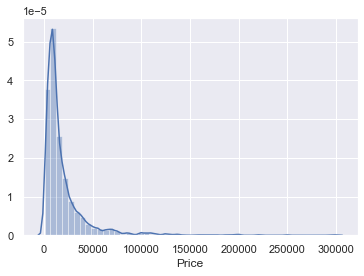

In [8]:
sns.distplot(data_no_mv['Price'])

In [9]:
# We normally expect that price would have a normal dist but it is exponential. So, there are outliers in the data.
# To overcome this, remove top 1% of the observations, and keep 99% of the observations.

In [10]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price'] < q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


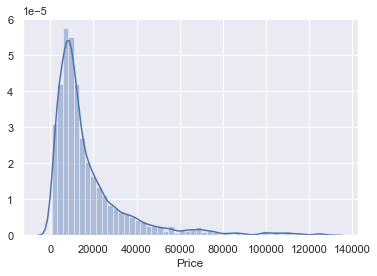

In [11]:
sns.distplot(data_1['Price'])

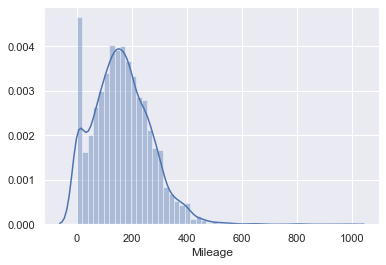

In [12]:
sns.distplot(data_no_mv['Mileage'])

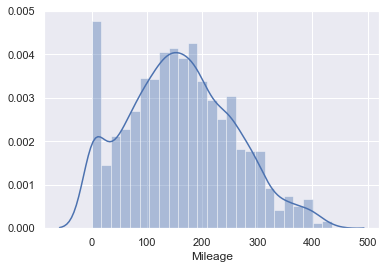

In [13]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage'] < q]
sns.distplot(data_2['Mileage'])

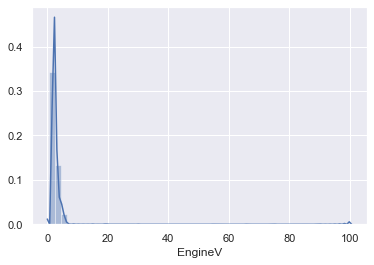

In [14]:
sns.distplot(data_1['EngineV'])

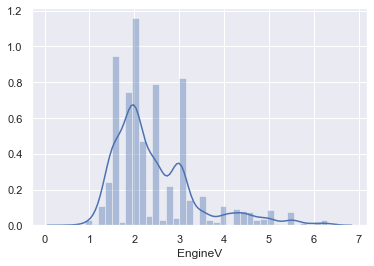

In [15]:
data_3 = data_2[data_2['EngineV'] < 6.5]
sns.distplot(data_3['EngineV'])

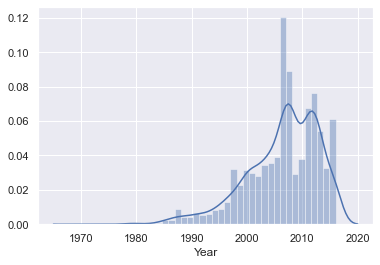

In [16]:
sns.distplot(data_3['Year'])

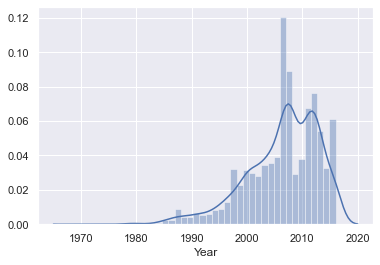

In [17]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year'] > 0.01]
sns.distplot(data_4['Year'])

In [18]:
data_cleaned = data_4.reset_index(drop = True)

In [19]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3921,3921.000000,3921,3921.000000,3921.000000,3921,3921,3921.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,862,NaN,1499,NaN,NaN,1818,3559,NaN
mean,NaN,17988.421311,NaN,161.279776,2.443497,NaN,NaN,2006.406019
std,NaN,19041.658686,NaN,96.068269,0.946198,NaN,NaN,6.595871
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21500.000000,NaN,229.000000,3.000000,NaN,NaN,2012.000000


## OLS assumptions

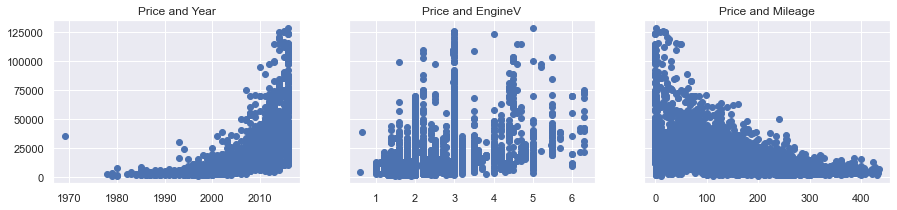

In [20]:
# Here we decided to use some matplotlib code, without explaining it
# We can simply use plt.scatter() for each of them
# But since Price is the 'y' axis of all the plots, it made sense to plot them side-by-side (so we can compare them)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')


plt.show()

In [21]:
# We can see some patterns but they are not linear ones for sure, looks like we need to use log transformation. 

In [22]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned 

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3916,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3917,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3918,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557
3919,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,8.987197


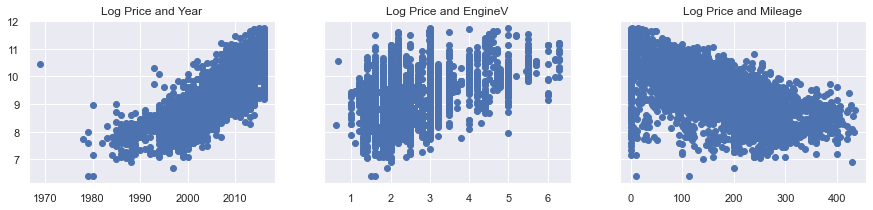

In [23]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')


plt.show()

In [24]:
data_cleaned = data_cleaned.drop(['Price'], axis = 1)

In [25]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [26]:
# We might expect to have a collinearity b/w mileage and year, so we should check for multicollinearity by using variance inflation factor (VIF).

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To make this as easy as possible to use, we declare a variable where we put
# all features where we want to check for multicollinearity
# since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = data_cleaned[['Mileage','Year','EngineV']]

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns

In [28]:
vif

,VIF,Features
0,3.791073,Mileage
1,10.397185,Year
2,7.671170,EngineV


In [29]:
# It seems that the varb year is correlated with other varbs, so we will remove it.

In [30]:
data_no_mc = data_cleaned.drop(['Year'], axis=1)

## Dummy Variables

In [31]:
data_with_dummies = pd.get_dummies(data_no_mc, drop_first = True)

In [32]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [33]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [34]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [35]:
data_preprocessed = data_with_dummies[cols]

In [36]:
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Linear Regression

In [37]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis=1)

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [39]:
inputs_scaled = scaler.transform(inputs)

### Training and Testing Split

In [40]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size = 0.2, random_state = 365)

In [41]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [42]:
y_hat = reg.predict(x_train)

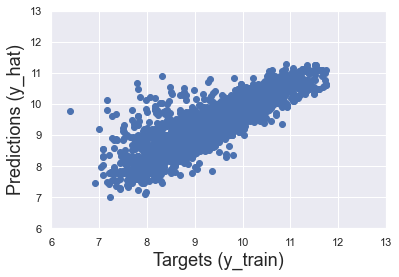

In [44]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size = 18)
plt.ylabel('Predictions (y_hat)', size = 18)
plt.xlim(6, 13)
plt.ylim(6, 13)

plt.show()

Text(0.5, 1.0, 'Residulals PDF')

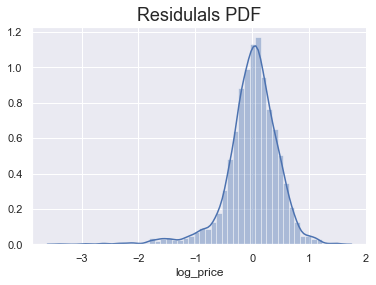

In [45]:
sns.distplot(y_train - y_hat)
plt.title("Residulals PDF", size = 18)

In [46]:
reg.score(x_train, y_train)

0.7262985119939247

In [47]:
reg.intercept_

9.3945175650554

In [48]:
reg.coef_

array([-0.45850621,  0.22118353,  0.02385727,  0.01482004, -0.12502118,
       -0.17463561, -0.05054421, -0.08369427, -0.16029143, -0.10388223,
       -0.19829007, -0.12207963, -0.15555148, -0.13027198, -0.03371434,
       -0.15241012,  0.30673013])

In [49]:
reg_summary = pd.DataFrame(inputs.columns.values, columns = ['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.458506
1,EngineV,0.221184
2,Brand_BMW,0.023857
3,Brand_Mercedes-Benz,0.014820
4,Brand_Mitsubishi,-0.125021
5,Brand_Renault,-0.174636
6,Brand_Toyota,-0.050544
7,Brand_Volkswagen,-0.083694
8,Body_hatch,-0.160291
9,Body_other,-0.103882


In [50]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

### Testing

In [51]:
y_hat_test = reg.predict(x_test)

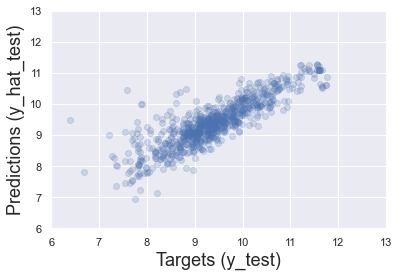

In [53]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)', size = 18)
plt.ylabel('Predictions (y_hat_test)', size = 18)
plt.xlim(6, 13)
plt.ylim(6, 13)

plt.show()

In [54]:
# New data frame for performance

df_pf = pd.DataFrame(y_hat_test, columns=['Prediction'])
df_pf

,Prediction
0,9.020395
1,9.894089
2,8.586029
3,9.431078
4,8.655797
...,...
780,9.381368
781,8.609664
782,9.330164
783,9.111091


In [55]:
# These values are log, so we need to take the exponentials of them, by using np.exp()

In [56]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf

,Prediction
0,8270.044621
1,19812.912809
2,5356.302504
3,12469.963529
4,5743.341921
...,...
780,11865.232645
781,5484.408240
782,11272.983089
783,9055.168578


In [57]:
df_pf['Targets'] = np.exp(y_test)
df_pf.head()

,Prediction,Targets
0,8270.044621,NaN
1,19812.912809,7900.0
2,5356.302504,NaN
3,12469.963529,NaN
4,5743.341921,NaN


In [61]:
y_test

1437    8.942461
3074    9.433484
2979    8.517193
2224    9.104869
299     8.779557
          ...   
3056    8.955448
819     8.922658
1677    9.487972
1469    9.296518
3232    9.350102
Name: log_price, Length: 785, dtype: float64

In [62]:
# The issue is bcs of the indices in the test data set.

In [63]:
y_test = y_test.reset_index(drop = True)
y_test

0      8.942461
1      9.433484
2      8.517193
3      9.104869
4      8.779557
         ...   
780    8.955448
781    8.922658
782    9.487972
783    9.296518
784    9.350102
Name: log_price, Length: 785, dtype: float64

In [64]:
df_pf['Targets'] = np.exp(y_test)
df_pf.head()

,Prediction,Targets
0,8270.044621,7650.0
1,19812.912809,12500.0
2,5356.302504,5000.0
3,12469.963529,8999.0
4,5743.341921,6500.0


In [65]:
df_pf['Residual'] = df_pf['Targets'] - df_pf['Prediction']

In [67]:
df_pf['Difference'] = np.absolute(df_pf['Residual']/df_pf['Targets']*100)
df_pf.describe()

,Prediction,Targets,Residual,Difference
count,785.000000,785.000000,785.000000,785.000000
mean,16076.795548,18435.820803,2359.025255,43.035264
std,13882.559983,21457.586797,11598.917265,111.733948
min,1028.206389,600.000000,-32294.496262,0.040494
25%,7567.547916,6999.000000,-2093.056650,11.964977
50%,11602.989122,11000.000000,210.011228,23.617888
75%,19543.544577,20500.000000,3502.824040,39.579679
max,79129.026158,129222.000000,85339.272411,2046.695124


In [68]:
df_pf.sort_values(['Difference'])

,Prediction,Targets,Residual,Difference
132,7596.922426,7600.00,3.077574,0.040494
589,12416.839813,12400.00,-16.839813,0.135805
317,1552.624544,1550.00,-2.624544,0.169325
194,22653.310510,22711.65,58.339490,0.256870
582,18252.643110,18300.00,47.356890,0.258781
...,...,...,...,...
496,8011.248561,1350.00,-6661.248561,493.425819
384,21706.729699,2700.00,-19006.729699,703.952952
731,22171.715673,2650.00,-19521.715673,736.668516
218,34244.496262,1950.00,-32294.496262,1656.128013


In [69]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(['Difference'])

,Prediction,Targets,Residual,Difference
132,7596.92,7600.00,3.08,0.04
589,12416.84,12400.00,-16.84,0.14
317,1552.62,1550.00,-2.62,0.17
194,22653.31,22711.65,58.34,0.26
582,18252.64,18300.00,47.36,0.26
100,42614.43,42500.00,-114.43,0.27
553,4186.16,4200.00,13.84,0.33
270,42648.80,42500.00,-148.80,0.35
543,13546.63,13600.00,53.37,0.39
653,11487.78,11403.99,-83.79,0.73
